# WeatherPy
----

#### Observations
* There does not appear to be an overt relationship between latitude and cloudiness or latitude and wind speed.


* While the northen hemisphere appears to have negative correlation with max temperature (F) - meaning that the farther away from the equater, the colder it gets, the southern hemisphere has a positive correlation with max temperature, meaning the opposite. This indicates that the the closer a city is to the equater, the higher the max temperature would likely be.


* In the northern hemisphere, wind speeds(mph) have a positive correlation with latitude, meaning that the farther away from the equater and higher the latitude, the greater the wind speeds. Conversely, the southern hemisphere shows a negative correlation between latitude and wind speeds, which means that the lower the latitude and farther away from the equater, the higher the wind speeds.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from weather_api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
# Save base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Set lists for counter
cities_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("-----------------------------")
print("Beginning Data Retrieval ")
print("-----------------------------")

# Set counter andd loop through each character
i = 1
for city in cities:
    # Sleep for 1 second so we don't overwhelm the API limit of 60 calls/min
    time.sleep(1)
    
    # Create search query, make request and store in json
    query_url = base_url +"&q=" + city.replace(' ', "%20")
    response = requests.get(query_url)
    response_json = response.json()
    
    # Grab data for lists
    try:
        cloudiness.append(response_json["clouds"]["all"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        humidity.append(response_json["main"]["humidity"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        wind_speed.append(response_json["wind"]["speed"])
        cities_list.append(response_json["name"])
        print (f"Processing record {i}|{city}")
        i+=1   
    
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval 
-----------------------------
Processing record 1|nanortalik
Processing record 2|padang
Processing record 3|carnarvon
Processing record 4|vaini
Processing record 5|tehachapi
Processing record 6|husavik
Processing record 7|puerto ayora
Processing record 8|east london
Processing record 9|nemuro
Processing record 10|rio gallegos
Processing record 11|daru
Processing record 12|povenets
Processing record 13|san patricio
Processing record 14|stykkisholmur
Processing record 15|butaritari
Processing record 16|naze
Processing record 17|busselton
Processing record 18|albany
Processing record 19|dunmore town
Processing record 20|bintulu
Processing record 21|yelniki
Processing record 22|jamestown
Processing record 23|katsuura
Processing record 24|manokwari
Processing record 25|broken hill
Processing record 26|mar del plata
City not found. Skipping...
Processing record 27|kenai
City not found. Skipping...
Processing record 28|rikitea
Processing

Processing record 244|gat
Processing record 245|kruisfontein
Processing record 246|lucapa
Processing record 247|sitio novo do tocantins
Processing record 248|pomerode
Processing record 249|bubaque
Processing record 250|bom jesus
Processing record 251|urzhum
Processing record 252|kollegal
Processing record 253|samarai
Processing record 254|cidreira
Processing record 255|caravelas
City not found. Skipping...
Processing record 256|vila franca do campo
Processing record 257|narimanov
Processing record 258|saint-francois
Processing record 259|narsaq
Processing record 260|santa maria
Processing record 261|mandalgovi
Processing record 262|bocas del toro
Processing record 263|najran
Processing record 264|yashkul
Processing record 265|komsomolskiy
Processing record 266|pevek
Processing record 267|sainte-anne-des-monts
Processing record 268|yuancheng
Processing record 269|bethel
Processing record 270|sao joao da barra
Processing record 271|pisco
City not found. Skipping...
Processing record 272|

Processing record 481|minas de barroteran
Processing record 482|vyazma
City not found. Skipping...
Processing record 483|jawhar
Processing record 484|bandarbeyla
Processing record 485|khani
Processing record 486|kisangani
Processing record 487|port-gentil
Processing record 488|alyangula
City not found. Skipping...
Processing record 489|nkowakowa
Processing record 490|taseyevo
Processing record 491|big spring
Processing record 492|marystown
Processing record 493|phangnga
Processing record 494|ilo
Processing record 495|whitstable
Processing record 496|meulaboh
Processing record 497|batagay-alyta
Processing record 498|sorong
City not found. Skipping...
Processing record 499|ballina
City not found. Skipping...
Processing record 500|katherine
Processing record 501|mangan
Processing record 502|moose factory
Processing record 503|rio brilhante
Processing record 504|skjervoy
Processing record 505|itaituba
Processing record 506|tonantins
Processing record 507|rio branco
Processing record 508|to

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
# Create a DataFrame
city_weather_df = pd.DataFrame({"City": cities_list, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed})

# Display head of DataFrame
city_weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nanortalik,99,GL,1609795197,96,60.14,-45.24,27.12,8.41
1,Padang,90,ID,1609795199,88,-0.95,100.35,73.40,1.12
2,Carnarvon,75,AU,1609795200,94,-24.87,113.63,71.60,6.93
3,Vaini,75,TO,1609795203,88,-21.20,-175.20,80.60,9.17
4,Tehachapi,1,US,1609794962,44,35.13,-118.45,53.60,18.34
5,Husavik,20,IS,1609795205,64,66.04,-17.34,39.20,12.75
6,Puerto Ayora,20,EC,1609795207,65,-0.74,-90.35,80.60,8.05
7,East London,98,ZA,1609795209,72,-33.02,27.91,76.75,7.61
8,Nemuro,0,JP,1609795210,88,43.32,145.57,19.40,15.17
9,Río Gallegos,0,AR,1609795211,25,-51.62,-69.22,64.40,17.22


In [38]:
#Checking count of DataFrame to ensure it is over 500
city_weather_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [35]:
#Save DataFrame to CSV
city_weather_df.to_csv('cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
# Find count of cities with a humidity > 100%
city_weather_df.describe()

# A quick .describe view of the Data Frame shows that the highest humidity is 100% and nothing above this value.

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,566.000000,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,56.632509,1.609796e+09,74.448763,21.342208,12.388551,49.418905,8.308657
std,38.593492,2.186021e+02,19.237225,33.383966,89.366472,32.903948,5.880479
min,0.000000,1.609795e+09,13.000000,-54.800000,-179.170000,-52.600000,0.540000
25%,20.000000,1.609795e+09,66.000000,-5.737500,-66.527500,30.750000,3.410000
50%,70.500000,1.609796e+09,79.000000,25.625000,17.500000,60.800000,6.930000
75%,94.000000,1.609796e+09,88.000000,50.560000,86.390000,76.987500,11.410000
max,100.000000,1.609796e+09,100.000000,78.220000,179.320000,93.000000,43.620000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [81]:
# Import datetime library to add time stamp + test
import datetime

today = datetime.date.today()
print("{:%b, %d %Y}".format(today))

Jan, 04 2021


## Latitude vs. Temperature Plot

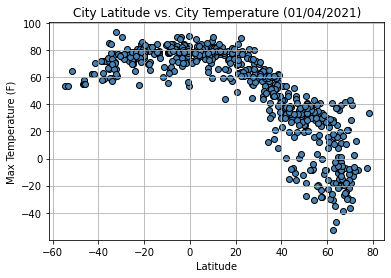

In [129]:
#Create Scatter Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker = "o", facecolor = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. City Temperature ({:%m/%d/%Y})".format(today)) 
plt.grid()
plt.savefig('latvstemperatureplot.png')

## Latitude vs. Humidity Plot

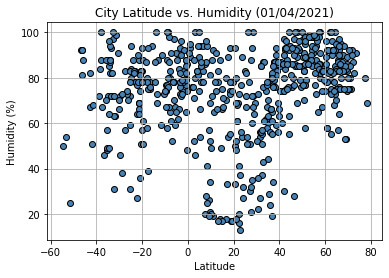

In [130]:
#Create Scatter Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker = "o", facecolor = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity ({:%m/%d/%Y})".format(today))
plt.grid()
plt.savefig('latvshumidityplot.png')

## Latitude vs. Cloudiness Plot

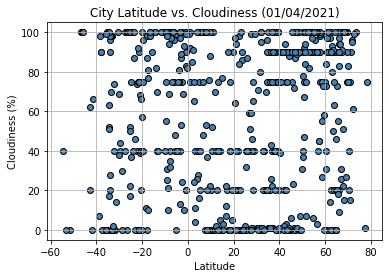

In [131]:
#Create Scatter Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker = "o", facecolor = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness ({:%m/%d/%Y})".format(today))
plt.grid()
plt.savefig('latvscloudinessplot.png')

## Latitude vs. Wind Speed Plot

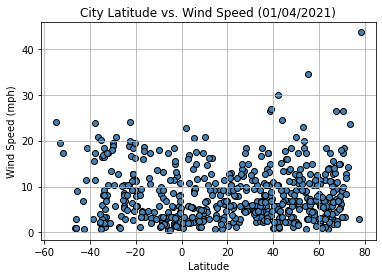

In [132]:
#Create Scatter Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker = "o", facecolor = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed ({:%m/%d/%Y})".format(today))
plt.grid()
plt.savefig('latvswindspeedplot.png')

## Linear Regression

In [84]:
#Create Northern Hemisphere
northern_hemisphere = city_weather_df.loc[city_weather_df["Lat"]>0]

#Create Southern Hemisphere
southern_hemisphere = city_weather_df.loc[city_weather_df["Lat"]<0]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nanortalik,99,GL,1609795197,96,60.14,-45.24,27.12,8.41
4,Tehachapi,1,US,1609794962,44,35.13,-118.45,53.60,18.34
5,Husavik,20,IS,1609795205,64,66.04,-17.34,39.20,12.75
8,Nemuro,0,JP,1609795210,88,43.32,145.57,19.40,15.17
11,Povenets,93,RU,1609795044,96,62.85,34.83,16.09,3.62
...,...,...,...,...,...,...,...,...,...
558,Barabash,0,RU,1609795903,75,43.20,131.48,-14.80,4.63
560,Koslan,50,RU,1609795905,92,63.46,48.90,-2.45,4.14
561,Ossora,73,RU,1609795906,83,59.24,163.07,-8.48,7.83
562,Ţaga,90,RO,1609795908,100,46.95,24.05,41.00,4.63


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8522449059452791


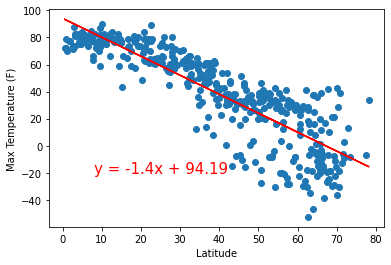

<Figure size 432x288 with 0 Axes>

In [136]:
#Map out linear regression analysis
x_values = (northern_hemisphere['Lat'])
y_values = (northern_hemisphere['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('northern_latvsmaxtemp_linearregression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4966870233002831


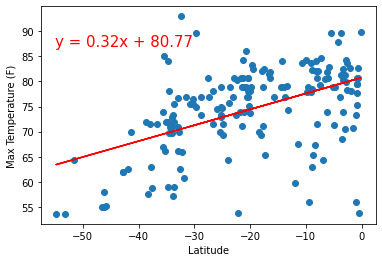

<Figure size 432x288 with 0 Axes>

In [135]:
#Map out linear regression analysis
x_values = (southern_hemisphere['Lat'])
y_values = (southern_hemisphere['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,87),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('southern_latvsmaxtemp_linearregression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3795511114549002


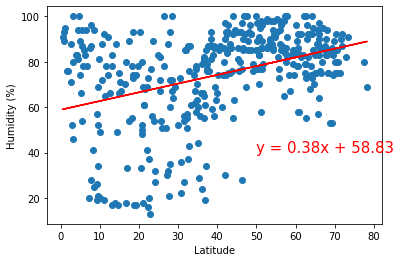

<Figure size 432x288 with 0 Axes>

In [137]:
#Map out linear regression analysis
x_values = (northern_hemisphere['Lat'])
y_values = (northern_hemisphere['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('northern_latvshumidity_linearregression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15022699904665404


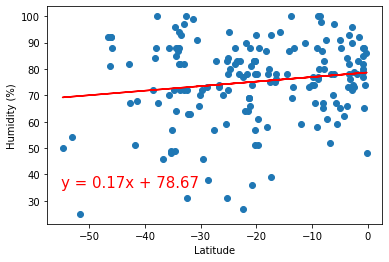

<Figure size 432x288 with 0 Axes>

In [138]:
#Map out linear regression analysis
x_values = (southern_hemisphere['Lat'])
y_values = (southern_hemisphere['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('southern_latvshumidity_linearregression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2627055001766975


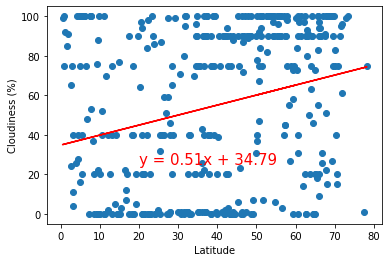

<Figure size 432x288 with 0 Axes>

In [139]:
#Map out linear regression analysis
x_values = (northern_hemisphere['Lat'])
y_values = (northern_hemisphere['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('northern_latvscloudiness_linearregression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2278216864434801


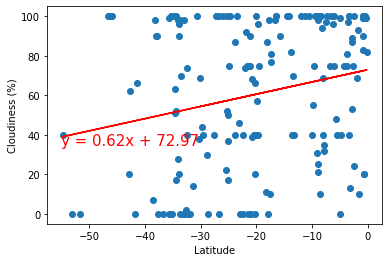

<Figure size 432x288 with 0 Axes>

In [141]:
#Map out linear regression analysis
x_values = (southern_hemisphere['Lat'])
y_values = (southern_hemisphere['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('southern_latvscloudiness_linearregression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12048598805299954


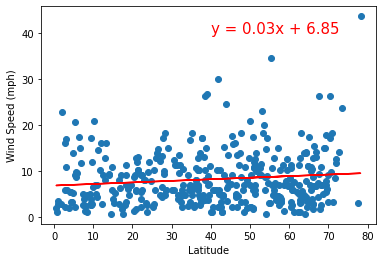

<Figure size 432x288 with 0 Axes>

In [142]:
#Map out linear regression analysis
x_values = (northern_hemisphere['Lat'])
y_values = (northern_hemisphere['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('northern_latvswindspeed_linearregression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.24091287451551907


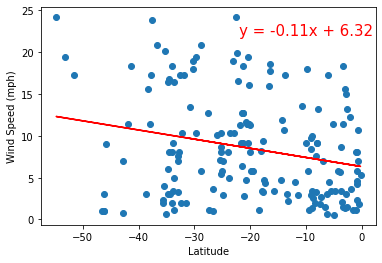

<Figure size 432x288 with 0 Axes>

In [143]:
#Map out linear regression analysis
x_values = (southern_hemisphere['Lat'])
y_values = (southern_hemisphere['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig('southern_latvswindspeed_linearregression.png')